In [5]:
import pandas as pd
data = pd.read_csv('../data/raw_analyst_ratings.csv')
framed_data = pd.DataFrame(data)
print(framed_data.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\CraftSoft\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                            headline  sentiment_score  \
0            Stocks That Hit 52-Week Highs On Friday            0.000   
1         Stocks That Hit 52-Week Highs On Wednesday            0.000   
2                      71 Biggest Movers From Friday            0.000   
3       46 Stocks Moving In Friday's Mid-Day Session            0.000   
4  B of A Securities Maintains Neutral on Agilent...            0.296   

  sentiment  
0   neutral  
1   neutral  
2   neutral  
3   neutral  
4  positive  


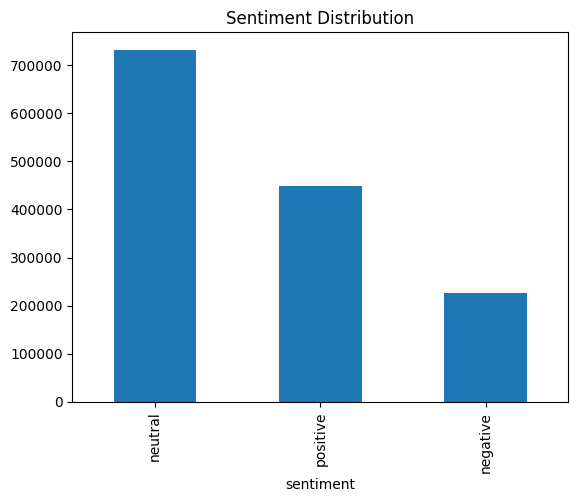

In [11]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# Initialize sentiment analyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()





In [12]:
# Perform sentiment analysis on headlines
framed_data['sentiment_score'] = framed_data['headline'].apply(lambda x: sid.polarity_scores(x)['compound'])
framed_data['sentiment'] = framed_data['sentiment_score'].apply(
    lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral'
)

                                            headline  sentiment_score  \
0            Stocks That Hit 52-Week Highs On Friday            0.000   
1         Stocks That Hit 52-Week Highs On Wednesday            0.000   
2                      71 Biggest Movers From Friday            0.000   
3       46 Stocks Moving In Friday's Mid-Day Session            0.000   
4  B of A Securities Maintains Neutral on Agilent...            0.296   

  sentiment  
0   neutral  
1   neutral  
2   neutral  
3   neutral  
4  positive  


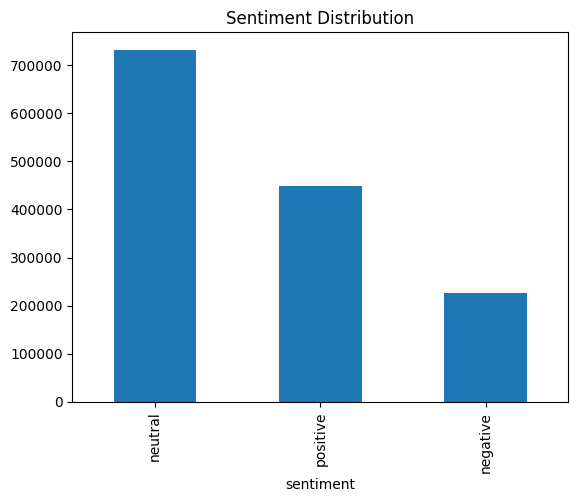

In [14]:
# Display the first few rows to check the sentiment analysis results
print(framed_data[['headline', 'sentiment_score', 'sentiment']].head())

# Plot the distribution of sentiments
framed_data['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.show()


In [18]:
print(framed_data.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  sentiment_score sentiment  
0  2020-06-05 10:30:54-04:00     A            0.000   neutral  
1  2020-06-0

In [3]:
pip install scikit-learn


   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
    --------------------------------------- 0.3/10.9 MB ? eta -:--:--
    --------------------------------------- 0.3/10.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.9 MB 560.1 kB/s eta 0:00:19
   - -------------------------------------- 0.5/10.9 MB 560.1 kB/s eta 0:00:19
   -- ------------------------------------- 0.8/10.9 MB 645.7 kB/s eta 0:00:16
   -- ------------------------------------- 0.8/10.9 MB 645.7 kB/s eta 0:00:16
   --- ------------------------------------ 1.0/10.9 MB 606.8 kB/s eta 0:00:17
   --- ------------------------------------ 1.0/10.9 MB 606.8 kB/s eta 0:00:17
   ---- ----------------------------------- 1.3/10.9 MB 651.7 kB/s eta 0:00:15
   ----- ---------------------------------- 1.6/10.9 MB 729.8 kB/s eta 0:00:13
   ------ -------

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert headlines to lowercase and remove stopwords for topic modeling
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(framed_data['headline'])

# Use Latent Dirichlet Allocation (LDA) to find topics
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(tfidf_matrix)

# Display the top keywords for each topic87
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)





Topic 0:
update shares market pt buy announces morning initiates coverage 00
Topic 1:
vs est eps reports sales price raises bank estimate q4
Topic 2:
stocks benzinga week 52 earnings session market moving scheduled biggest
